In [105]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt

Klek_key = pd.read_csv('keys/KlekFP_keys', names=['smarts'], sep='\t')
MACCS_key = pd.read_csv('keys/MACCSFP_keys', names=['smarts'], sep='\t')
Sub_key = pd.read_csv('keys/SubFP_keys', names=['smarts'], sep='\t')

In [136]:
#-------------------------------------------------------------#
fp_type = 'Klek' # ('Klek', 'MACCS', 'Sub')
key = Klek_key
#-------------------------------------------------------------#

dataset = pd.read_csv(f'cleaned_datasets/5ht1a_{fp_type}_clean.csv')

fp = dataset.iloc[5157]
fp = fp[2:].astype(bool)

dataset

,Ki,Class,KRFP1,KRFP2,KRFP7,KRFP8,KRFP10,KRFP13,KRFP14,KRFP16,...,KRFP4839,KRFP4842,KRFP4843,KRFP4852,KRFP4853,KRFP4854,KRFP4856,KRFP4857,KRFP4859,KRFP4860
0,860.000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14.400,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92.000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17.000,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,20.300,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5195,4.074,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5196,2.300,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5197,10.000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Fragment 0: matches 15
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
Fragment 1: matches 11
[False  True  True  True  True  True  True  True False False  True False
 False False False False False False False False  True  True  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fal

/home/rybka/miniconda3/envs/mldd23/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


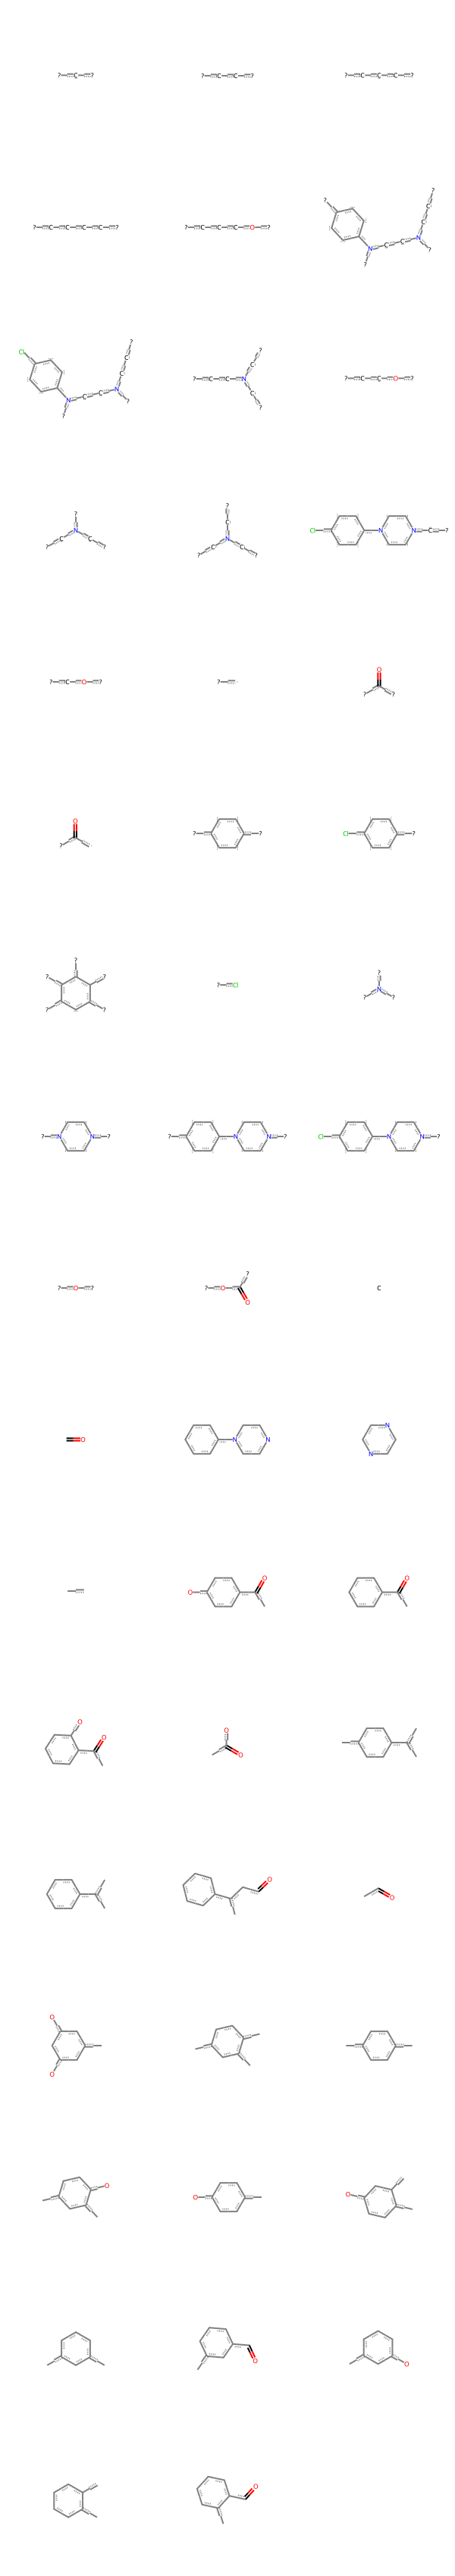

In [137]:
# decode fingerptint using key

if fp_type == 'Klek': label_len = 4
elif fp_type == 'MACCS': label_len = 7
elif fp_type == 'Sub': label_len = 5

fragments = []
for item in fp.items():
    present = item[1]
    if present:
        index = int(item[0][label_len:]) - 1
        smarts = (key.iloc[index][0])
        mol = Chem.rdmolfiles.MolFromSmarts(smarts)
        Chem.SanitizeMol(mol)
        fragments.append(mol)
        
unique_fragments = []
uniqueness = 0 # no. of other fragments, which the checked fragment is a substructure of.
for i, mol in enumerate(fragments):
    matches = []
    for j, substructure in enumerate(fragments):
        if(i != j):
            match = substructure.GetSubstructMatches(mol)
            matches.append(match != ())
    matches = np.array(matches)
    print(f'Fragment {i}: matches {np.sum(matches)}')
    print(matches)
    if np.sum(matches) == uniqueness:
        unique_fragments.append(mol)

#Draw.MolToImage(fragments[21])
Draw.MolsToGridImage(fragments)


In [138]:
from ipywidgets import interact

In [139]:
# load ChEMBL

# small molecule
# no RO5 violations
# 200 - 1000 Da
# targets 1, bioactivities 1

df = pd.read_csv('chembl.csv', sep=';', usecols=['Smiles'])

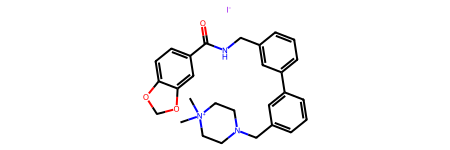

In [57]:
# view molecules in df

smiles = df.loc[9].iat[0]
mol = Chem.rdmolfiles.MolFromSmiles(smiles)
mol

In [ ]:
# TODO ----------- SMILES TO FP -------------

klek_arr = []
df['KlekFP'] = klek_arr

In [59]:
df.to_csv('smiles_fp.csv', sep=';', index=False, compression=None)  